In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.palettes import Category10_10

# Read the CSV file with counts
df = pd.read_csv('unique_words_HI_nonToxic.csv')


# Hindi

## Tone

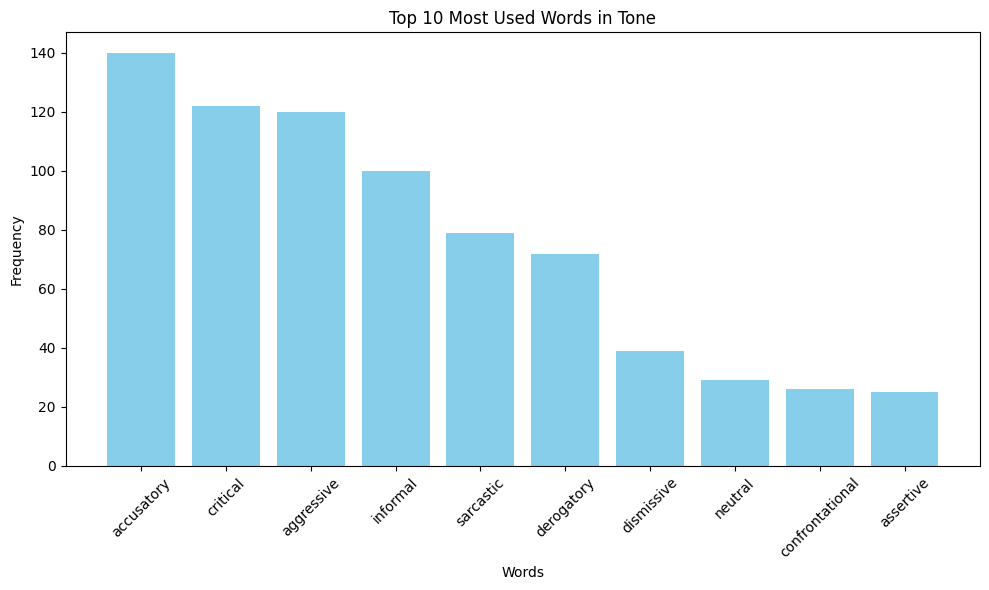

              Tone  Tone appears
0       accusatory         140.0
1         critical         122.0
2       aggressive         120.0
3         informal         100.0
4        sarcastic          79.0
5       derogatory          72.0
6       dismissive          39.0
7          neutral          29.0
8  confrontational          26.0
9        assertive          25.0


In [2]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

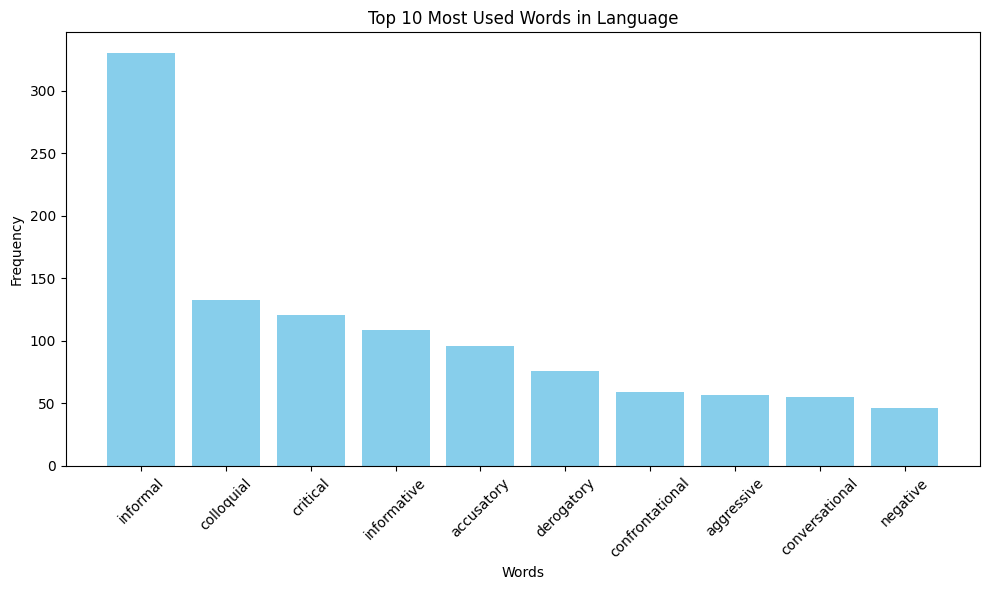

          Language  Language appears
0         informal             330.0
1       colloquial             133.0
2         critical             121.0
3      informative             109.0
4       accusatory              96.0
5       derogatory              76.0
6  confrontational              59.0
7       aggressive              57.0
8   conversational              55.0
9         negative              46.0


In [3]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

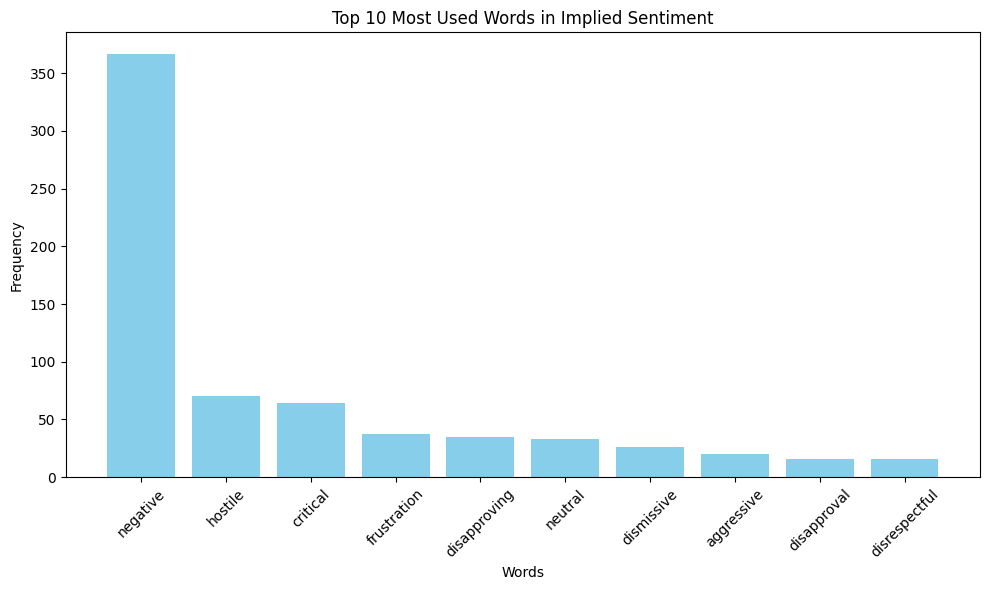

  Implied Sentiment  Implied Sentiment appears
0          negative                      367.0
1           hostile                       70.0
2          critical                       64.0
3       frustration                       37.0
4      disapproving                       35.0
5           neutral                       33.0
6        dismissive                       26.0
7        aggressive                       20.0
8       disapproval                       16.0
9     disrespectful                       16.0


In [4]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

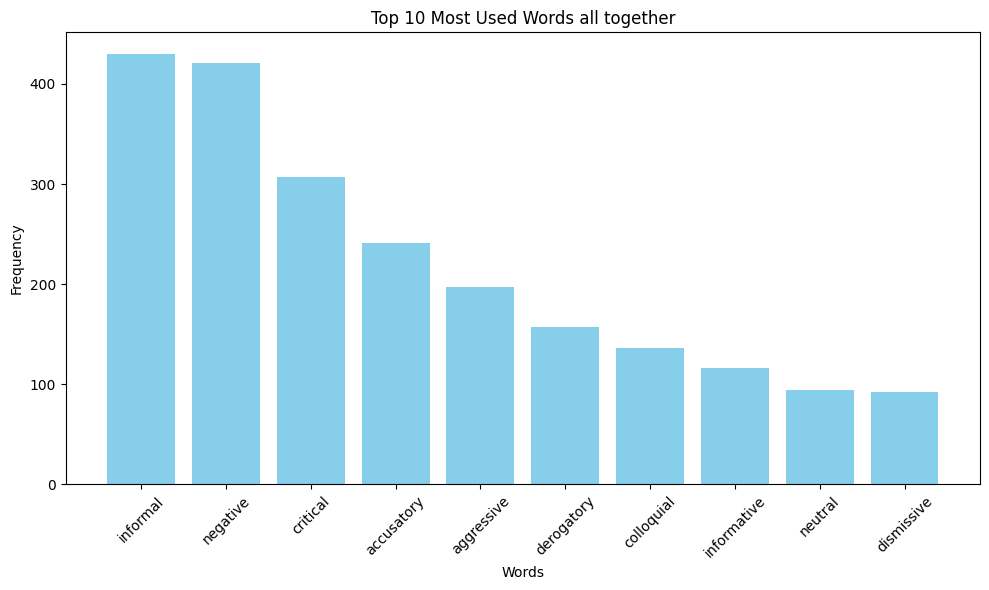

       combine  combine appears
0     informal            430.0
1     negative            421.0
2     critical            307.0
3   accusatory            241.0
4   aggressive            197.0
5   derogatory            157.0
6   colloquial            136.0
7  informative            116.0
8      neutral             94.0
9   dismissive             92.0


In [5]:
# Plot histogram for the 'Combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(combine_df['combine'], combine_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(combine_df)

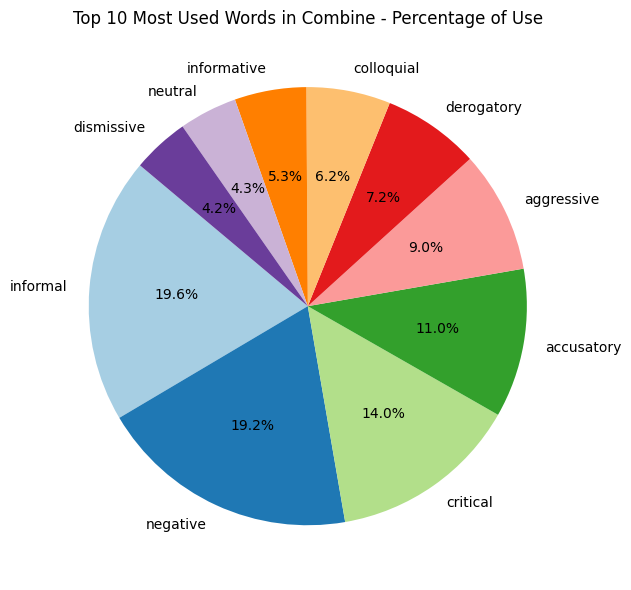

In [6]:
total_sentences = 1000

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

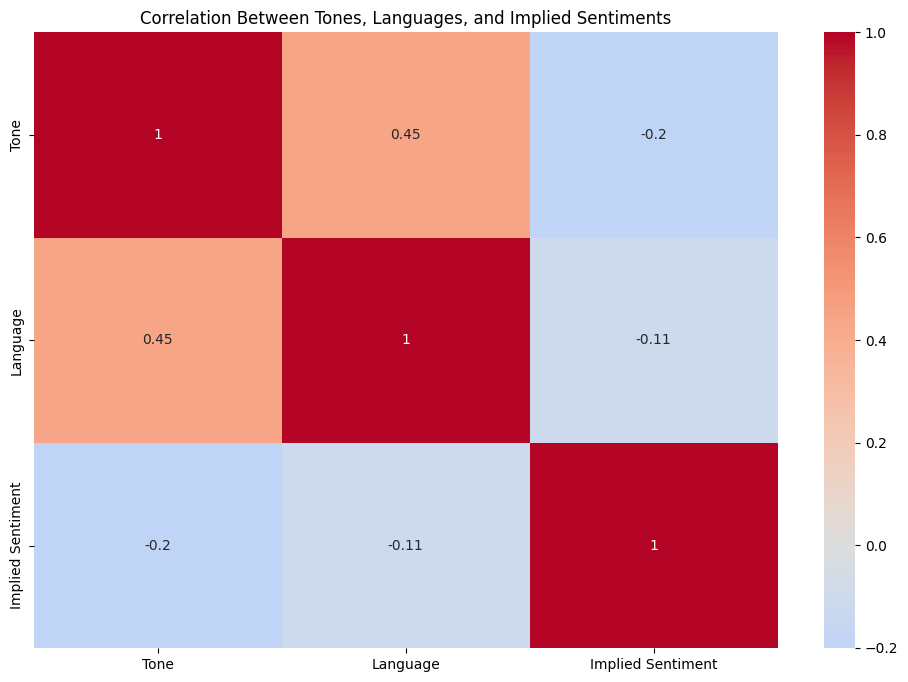

In [7]:
# Combine all data into one DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'Tone': tone_df.set_index('Tone')['Tone appears'],
    'Language': language_df.set_index('Language')['Language appears'],
    'Implied Sentiment': implied_sentiment_df.set_index('Implied Sentiment')['Implied Sentiment appears']
}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Tones, Languages, and Implied Sentiments')
plt.show()

## Toxic Words

In [9]:
df_t = pd.read_csv('HI-nonToxicWordsList.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

# plt.figure(figsize=(10, 6))
# plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.title('Top 10 Most Toxic Words')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
print(df_toxic)

  uniq sequences  number appears
0           none             155
1           बुरे              84
2          बेकार              79
3           बुरा              20
4          तमाशा              18
5            अबे              16
6           बुरी              15
7             तू              14
8       पक्षपाती              13
9        पक्षपात              11
